# EMOTION RECOGNITION APPLICATION WITH DEEP LEARNING FROM FACE IMAGES

---


* **Language:** Python 

* **Libraries:** Keras/TensorFlow

* **Cloud:** Google Cloud,  Colab service (Tesla K80 GPU)

* **Dataset:** [KAGGLE- Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)






### Authentication Process



In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
import os

os.chdir('/gdrive/My Drive/Keras İle Derin Öğrenme/')

In [7]:
!ls 

'Copy of Aktivasyon_Fonksiyonları_Karşılaştırması.ipynb'
'Copy of AsiriUydurma_Overfitting_v1.ipynb'
'Copy of AsiriUydurma_Overfitting_v2.ipynb'
'Copy of Colab_CalismaOrtami.ipynb'
'Copy of Duygu_Tanima.ipynb'
'Copy of Fashion_MNIST.ipynb'
'Copy of Fine-Tune_TransferOgrenme.ipynb'
'Copy of Katmanlar ve Modeller.ipynb'
'Copy of MNIST_YSA.ipynb'
'Copy of Optimizasyon_Yöntemlerinin_Karşılaştırması.ipynb'
'Copy of RakamTanima_CNN.ipynb'
'Copy of ResNet50_NesneTanima_ImageNet.ipynb'
'Copy of Vektörler   Matrisler   Tensörler.ipynb'
'Copy of veriartirma_1.ipynb'
'Copy of VGG16_NesneTanima.ipynb'


### **Beggining of App **
Uploading necessary docs...

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

**Reading dataset...**

Dataset includes **35887 ** rows and **3** columns

In [11]:
root = '/gdrive/My Drive/Keras İle Derin Öğrenme/'

data = pd.read_csv(root + 'fer2013.csv')
data.shape

(35887, 3)

**Lets see some of them!**

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


**Numbers of train/test datas**

In [12]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

### **PRE-PROCESSING STEPS FOR TRAINING DATA**

In [13]:
np.unique(data["Usage"].values.ravel())

print('Numbers of training set: %d'%(len(data[data.Usage == "Training"])))

Numbers of training set: 28709


Picking training part.

In [14]:
train_data = data [data.Usage == "Training"]

In [15]:

train_pixels = train_data.pixels.str.split(" ").tolist() 

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [16]:
#Arranging the img with  48x48 piksel 
def show(img):
    show_image = img.reshape(48,48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

**An example from training set**

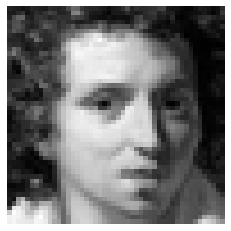

In [17]:
 
show(train_images[1000])

**Numbers of classification of train set.**

In [23]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Numbers of different face expressions  %d'%train_labels_count)

Numbers of different face expressions  7


**Let's see the class that falls on each of the data in the training set, that is, the size of the training process, with One Hot.**

In [19]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [20]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)

y_train = y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


### TEST DATA PRE-PROCESSING STEPS


In [22]:
np.unique(data["Usage"].values.ravel()) 

print('Numbers of test dataset: %d'%(len(data[data.Usage == "PublicTest"])))

Numbers of test dataset: 3589


For the training process, we take the **PublicTest** part reserved in the dataset.

In [24]:
test_data = data[data.Usage == "PublicTest"] 
test_pixels = test_data.pixels.str.split(" ").tolist() 

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images.shape)



(3589, 2304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


**An example from Test Dataset**

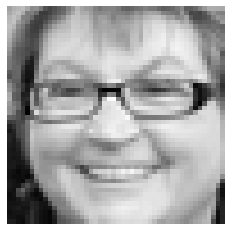

In [25]:

show(test_images[100])

**With One Hot, let's see the class that falls on each of the data in the test set, that is, the size of the training process..**

In [26]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


### SAMPLE IMAGES FROM THE TEST SET

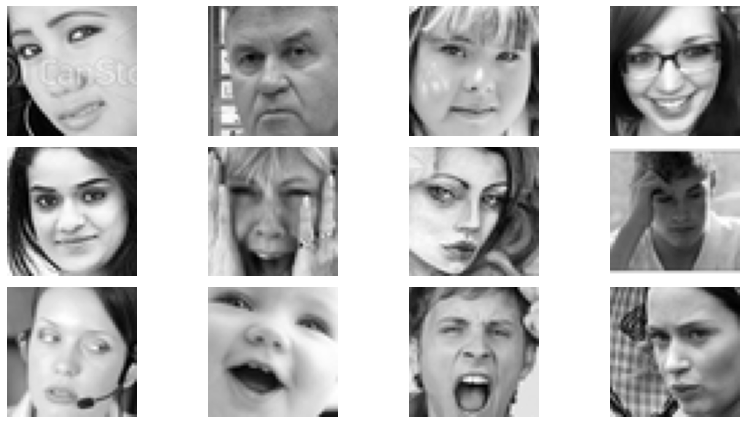

In [27]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = test_images[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

## 
DEFINITION OF DEEP CONVERSION NETWORK MODEL

the model we use: 


---


![CNNMODEL](https://drive.google.com/uc?export=view&id=1npoZADIuPfMlEkRTKW4CCcnNKVlLE3OK)





In [29]:
model = Sequential()

#1. Layer
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2. Layer

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #%60 forgetting process(dropout)

### 3. Layer
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))


### 4. Layer
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

### 5. Layer
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

### Layer
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))#%60 unutma işlemi(nöron silme-dropout)

### Output Layer

model.add(Dense(7))
model.add(Activation('softmax')) #Classification process (7 emotion class exist)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Determination of optimization and performance calculation metrics
#Let's visualize the model summary

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 46, 46, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 44, 44, 64)       

### 3. Layer
```
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
```

### 4. Layer
```
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
```

### 5. Layer
```
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))#%60 unutma işlemi(nöron silme-dropout)
```

### FULL CONNECTION LAYER
```
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)
```

### Output Layer

```
model.add(Dense(7))
model.add(Activation('softmax')) #Sınıflama işlemi (7 duygu sınıfı var)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
model.summary() #model özetini görselleştirelim
```




**Let's print the number of elements, height and width, number of channels of the Training and Test sets to the screen..**

In [30]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


# **Number of elements and emotion classes of the Training and Test sets.**

In [31]:
print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


**Calculating epoch,batchsize and saving the result in document '.h5'**

In [32]:
# most succesfull
checkpointer = ModelCheckpoint(filepath=root + 'data/face_model.h5', verbose=1, save_best_only=True)

epochs = 10
batchSize = 100

# start the model

hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)
                
# save model to json
model_json = model.to_json()
with open(root + 'data/face_model.json', 'w') as json_file:
  json_file.write(model_json)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.68108, saving model to /gdrive/My Drive/Keras İle Derin Öğrenme/data/face_model.h5
288/288 - 18s - loss: 2.0437 - accuracy: 0.2307 - val_loss: 1.6811 - val_accuracy: 0.3530 - 18s/epoch - 63ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.68108 to 1.60660, saving model to /gdrive/My Drive/Keras İle Derin Öğrenme/data/face_model.h5
288/288 - 9s - loss: 1.7000 - accuracy: 0.3290 - val_loss: 1.6066 - val_accuracy: 0.3739 - 9s/epoch - 30ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.60660 to 1.46885, saving model to /gdrive/My Drive/Keras İle Derin Öğrenme/data/face_model.h5
288/288 - 8s - loss: 1.5745 - accuracy: 0.3858 - val_loss: 1.4689 - val_accuracy: 0.4377 - 8s/epoch - 29ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.46885 to 1.38860, saving model to /gdrive/My Drive/Keras İle Derin Öğrenme/data/face_model.h5
288/288 - 9s - loss: 1.4758 - accuracy: 0.4267 - val_loss: 1.3886 - val_accuracy: 0.4639 - 9s/

### **Processes of graphically expressing and printing the Training and Validation results obtained as a result of the training.**

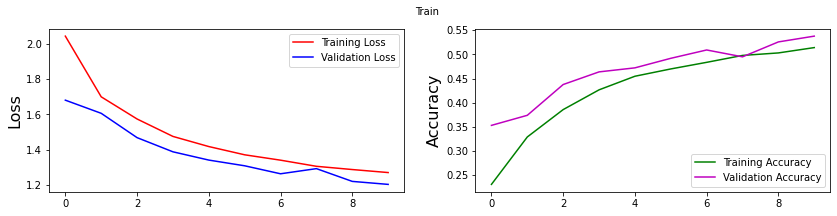

In [33]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Train', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()


Test it with **PrivateTest** examples before submit it on Kaggle 

In [34]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))

test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [35]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [36]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [37]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest accuracy rate:", score)

PrivateTest accuracy rate: [1.201228380203247, 0.5416550636291504]


 **We trained the model with the training part in the dataset and performed the test operations with the data reserved for testing.**

---

## Let's perform tests with different images and visualize the results.

In [55]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

**Using best motel(succesfull one)**

In [42]:
model_best = load_model(root + 'data/face_model.h5')


In [46]:
os.chdir(root+'berke_images')  #/gdrive/Keras İle Derin Öğrenme/berke_images

In [47]:
!ls

test1.jpg  test2.jpg  test3.jpg


In [65]:

import tensorflow as tf
image_path = root + "berke_images/test2.jpg"

test_image_original = tf.keras.utils.load_img(image_path) # orjinal colorful img

test_image = tf.keras.utils.load_img(image_path, target_size=(48, 48), grayscale=True)
test_data = tf.keras.utils.img_to_array(test_image)

test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results = model_best.predict(test_data, batch_size=1)
results


1/1 [==============================] - 0s 292ms/step


array([[0.11368971, 0.00869036, 0.09443725, 0.2839788 , 0.12585752,
        0.04752809, 0.3258183 ]], dtype=float32)

### STEPS TO VISUALIZE THE RESULTS

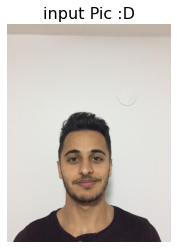

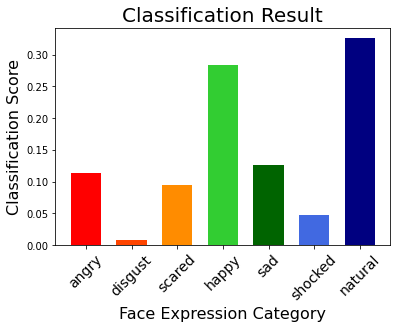

BEST SCORE : natural


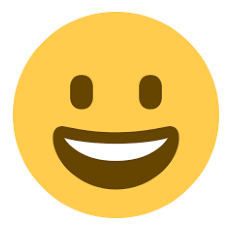

In [72]:
# classification of 7 emotions 
class_names = ['angry', 'disgust', 'scared', 'happy', 'sad', 'shocked', 'natural']

ind = 0.1+0.6*np.arange(len(class_names))
width = 0.4  #bar genişliği

color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']

# test resmimizi çizdirelim

plt.imshow(test_image_original)
plt.title('input Pic :D', fontsize=16)
plt.axis('off')
plt.show()

#sonuçlarımızı renklendirelim

for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])

plt.title("Classification Result", fontsize=20)
plt.xlabel("Face Expression Category",fontsize=16)
plt.ylabel("Classification Score",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()


print("BEST SCORE :", class_names[np.argmax(results)])

# Lets draw an emoji with equalty best score :))

emojis_img = tf.keras.utils.load_img(root + 'berke_images/emojis/%s.png'% str(class_names[np.argmax(results)]))

plt.imshow(emojis_img)
plt.axis('off')
plt.show()
